In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#c(W 122°31'13"--W 122°21'12"/N 37°49'02"--N 37°41'24")

In [45]:
data = pd.read_csv('../data/train-parking.csv', parse_dates=['Date'])
intersection_locations = pd.read_csv('../intersection_locations.csv',
                                    dtype = {'latitude' : np.float64, 
                                             'longitude' : np.float64}).set_index(['Street1', 'Street2'])

In [46]:
data[['hour', 'minute']] = data['Time'].str.extract('([0-9]+):([0-9]+)', expand = True).astype('int')
data = data.sort_values(['Date', 'hour', 'minute'])

In [47]:
data = data[data['Real.Spots'] < 100]

In [48]:
split1, split2 = int(data.shape[0] * .6), int(data.shape[1] * .8)
train = data.iloc[:split1]
val = data.iloc[split1:split2]
test = data.iloc[split2:]

In [49]:
train.groupby('hour').count()

,Street,From,To,Date,Time,Real.Spots,Street.Length,any_spot,minute
hour,,,,,,,,,
7,61,61,61,61,61,61,61,61,61
8,36,36,36,36,36,36,36,36,36
9,58,58,58,58,58,58,58,58,58
10,30,30,30,30,30,30,30,30,30
11,31,31,31,31,31,31,31,31,31
12,22,22,22,22,22,22,22,22,22
13,76,76,76,76,76,76,76,76,76
14,55,55,55,55,55,55,55,55,55
15,43,43,43,43,43,43,43,43,43


In [50]:
train.groupby('hour')['Real.Spots'].quantile([0,.25,.50,.75,1.00]).unstack()

,0.0,0.25,0.5,0.75,1.0
hour,,,,,
7,0.0,0.0,0.0,2.00,37.0
8,0.0,0.0,0.0,1.25,23.0
9,0.0,0.0,0.0,2.00,51.0
10,0.0,0.0,0.0,0.00,22.0
11,0.0,0.0,0.0,0.00,6.0
12,0.0,0.0,0.0,0.00,7.0
13,0.0,0.0,0.0,2.00,26.0
14,0.0,0.0,0.0,1.50,8.0
15,0.0,0.0,1.0,3.00,15.0


In [51]:
train.set_index(['Street', 'From', 'To'])\
    .loc['Mission Street', '25th Street', '26th Street']

/Users/tyler/anaconda2/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Date   Time  Real.Spots  \
Street         From        To                                          
Mission Street 25th Street 26th Street 2014-01-07  16:19           4   
                           26th Street 2014-01-20   8:50          17   
                           26th Street 2014-01-20  13:57           0   
                           26th Street 2014-01-20  17:54           7   
                           26th Street 2014-01-21  11:23           0   
                           26th Street 2014-01-23  18:36           2   
                           26th Street 2014-01-24  15:52           6   
                           26th Street 2014-01-25   7:44          17   
                           26th Street 2014-01-25   8:27          23   
                           26th Street 2014-01-26  19:15           1   
                           26th Street 2014-02-01  12:29           0   
                           26th Street 2014-02-15  18:39           0   
                           26th Street 2014-02-28  18:14           2   
                           26th Street 2014-03-01  18:31           0   
                           26th Street 2014-03-02   9:08           4   
                           26th Street 2014-03-05  19:36           0   
                           26th Street 2014-03-07  19:40           0   
                           26th Street 2014-03-08  21:09           0   
                           26th Street 2014-03-09   9:37           4   
                           26th Street 2014-03-09  13:54           5   

                                        Street.Length  any_spot  hour  minute  
Street         From        To                                                  
Mission Street 25th Street 26th Street      179.13297         1    16      19  
                           26th Street      179.13297         1     8      50  
                           26th Street      179.13297         0    13      57  
                           26th Street      179.13297         1    17      54  
                           26th Street      179.13297         0    11      23  
                           26th Street      179.13297         1    18      36  
                           26th Street      179.13297         1    15      52  
                           26th Street      179.13297         1     7      44  
                           26th Street      179.13297         1     8      27  
                           26th Street      179.13297         1    19      15  
                           26th Street      179.13297         0    12      29  
                           26th Street      179.13297         0    18      39  
                           26th Street      179.13297         1    18      14  
                           26th Street      179.13297         0    18      31  
                           26th Street      179.13297         1     9       8  
                           26th Street      179.13297         0    19      36  
                           26th Street      179.13297         0    19      40  
                           26th Street      179.13297         0    21       9  
                           26th Street      179.13297         1     9      37  
                           26th Street      179.13297         1    13      54

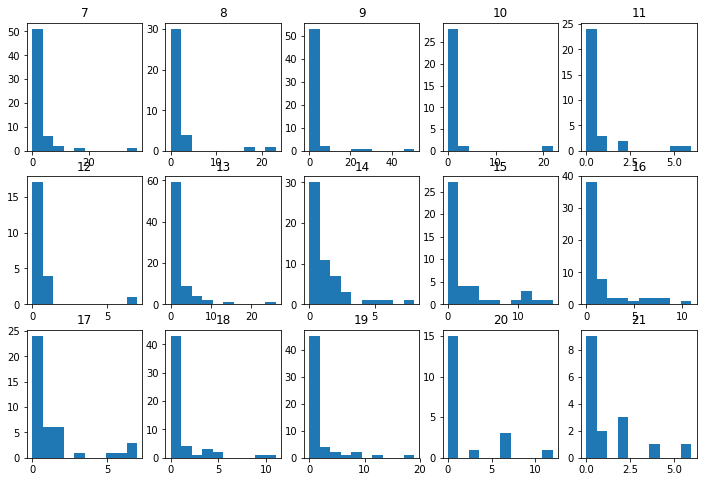

In [52]:
plt.figure(figsize=(12,8))
i = 1
for hour, x in train.groupby('hour'):
    plt.subplot(3, 5, i)
    plt.hist(x['Real.Spots'])
    plt.title(hour)
    i = i + 1

In [53]:
train.groupby(['Street', 'From', 'To', 'hour'])\
    .agg({'Real.Spots' : ['mean', 'count']})['Real.Spots']\
    .sort_values(['count'], ascending = False)

mean  \
Street             From                  To                 hour              
Van Ness Avenue    McAllister Street     Van Ness Avenue    7      0.200000   
23rd Street        Mission Street        Bartlett Street    19     1.600000   
Van Ness Avenue    McAllister Street     Van Ness Avenue    14     0.400000   
23rd Street        Mission Street        Capp Street        19     0.200000   
                   Bartlett Street       Valencia Street    19     1.200000   
                   South Van Ness Avenue Capp Street        19     3.200000   
Van Ness Avenue    Van Ness Avenue       Golden Gate Avenue 7      2.000000   
Pine Street        Polk Street           Van Ness Avenue    16     0.750000   
Van Ness Avenue    Van Ness Avenue       Turk Street        7      0.000000   
                   Hayes Street          Van Ness Avenue    7      4.000000   
                   Van Ness Avenue       Fell Street        7      0.750000   
Mission Street     25th Street           26th Street        18     1.000000   
Van Ness Avenue    Van Ness Avenue       Eddy Street        7      1.500000   
                                         Grove Street       7      0.000000   
                   Clay Street           Washington Street  13     3.000000   
Mission Street     25th Street           26th Street        19     0.333333   
Van Ness Avenue    Van Ness Avenue       Golden Gate Avenue 14     0.333333   
Jackson Street     Polk Street           Van Ness Avenue    19     0.000000   
23rd Street        Mission Street        Capp Street        17     0.333333   
Van Ness Avenue    Pacific Avenue        Broadway           14     3.000000   
Pine Street        Larkin Street         Polk Street        16     2.666667   
Polk Street        Jackson Street        Washington Street  19     0.000000   
Van Ness Avenue    Van Ness Avenue       Grove Street       14     0.000000   
                                         Fell Street        9      0.000000   
23rd Street        South Van Ness Avenue Capp Street        17     1.666667   
Bryant Street      Mariposa Street       17th Street        16     5.000000   
Mission Street     6th Street            7th Street         9     33.333333   
23rd Street        Mission Street        Bartlett Street    16     1.000000   
Bryant Street      Mariposa Street       17th Street        17     1.666667   
Van Ness Avenue    Hayes Street          Van Ness Avenue    9      1.000000   
...                                                                     ...   
Kearny Street      Kearny Street         Sutter Street      17     0.000000   
                                                            13     0.000000   
Larkin Street      Sutter Street         Larkin Street      20     0.000000   
                   Turk Street           Eddy Street        9      1.000000   
                                                            13     0.000000   
                                                            18     0.000000   
Mission Street     25th Street           26th Street        17     7.000000   
                                                            16     4.000000   
                                                            15     6.000000   
                                                            12     0.000000   
                                                            11     0.000000   
                                                            7     17.000000   
                   11th Street           Mission Street     18     0.000000   
                                                            16     0.000000   
                                                            14     1.000000   
                                                            13     0.000000   
                                                            11     0.000000   
                                                            9      0.000000   
                                          

In [54]:
table = train[['Street', 'From', 'To']]\
    .join(intersection_locations, on = ['Street', 'From'])\
    .join(intersection_locations, on = ['Street', 'To'], rsuffix = '_end')

In [55]:
d = np.abs(table.latitude - table.latitude_end) \
    + np.abs(table.longitude - table.longitude_end)
long =  d > 0.02

In [56]:
table[long]

,Street,From,To,latitude,longitude,latitude_end,longitude_end
273,Jones Street,Sutter Street,Jones Street,37.788609,-122.413565,37.919203,-122.061829
268,Mason Street,Sutter Street,Mason Street,37.789024,-122.410274,37.685623,-121.910498
373,Mason Street,Sutter Street,Mason Street,37.789024,-122.410274,37.685623,-121.910498
513,Jones Street,Sutter Street,Jones Street,37.788609,-122.413565,37.919203,-122.061829
699,Mason Street,Sutter Street,Mason Street,37.789024,-122.410274,37.685623,-121.910498
717,Jones Street,Sutter Street,Jones Street,37.788609,-122.413565,37.919203,-122.061829
700,Mason Street,Sutter Street,Mason Street,37.789024,-122.410274,37.685623,-121.910498
718,Jones Street,Sutter Street,Jones Street,37.788609,-122.413565,37.919203,-122.061829


In [42]:
train = train[~long]

/Users/tyler/anaconda2/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


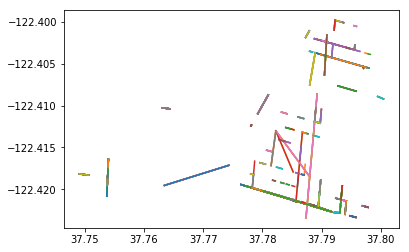

In [19]:
for i, data in table[~long].iterrows():
    #print(i)
    plt.plot([data['latitude'], data['latitude_end']], 
            [data['longitude'], data['longitude_end']], 
            )